In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import immigration_data
import xgboost as xgb
import get_best_xgb_model


Read in the data. I am showing the correction applied to take out long term average population growth in order to assess patters of population change over and above secular growth trends. Thus, I run the routine with "remove_trend = False"

In [2]:
imm = immigration_data.immigration_data()
pop = imm.read_population(remove_trend = False)

In [4]:
col_name = []
year = np.arange(16)+2002
for yy in year:
    col_name.append(str(yy) + '_mean')        
        
avg_pop = pop[col_name].sum()/pop[col_name[-1]].sum()
ll = np.polyfit(year, avg_pop, 1)

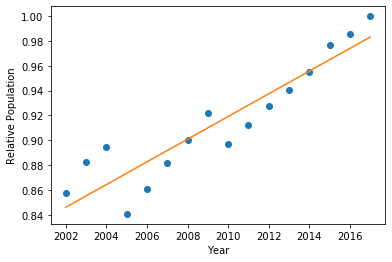

In [5]:
fig = plot.plot(year, avg_pop, '.', markersize = 12)
plot.plot(year, ll[0]*year + ll[1])
plot.xlabel('Year')
plot.ylabel('Relative Population')

plot.savefig('/Users/jabran/Desktop/pop_growth.pdf')

Re-read the data, correcting for secular growth trend. Here I am showing an example of the target. The model regression model tries to fit the relationship between the features and the relative change in population which is plotted below. The  coherent spatial patters indicate migration. The figure below is the logarithm of the population in 2017 relative to population in 2016. 

In [16]:
pop = imm.read_population()
pop2017 = pop['2017_mean']
pop2016 = pop['2016_mean']
x = pop['left']
y = pop['top']
dp = (pop2017 )/pop2016

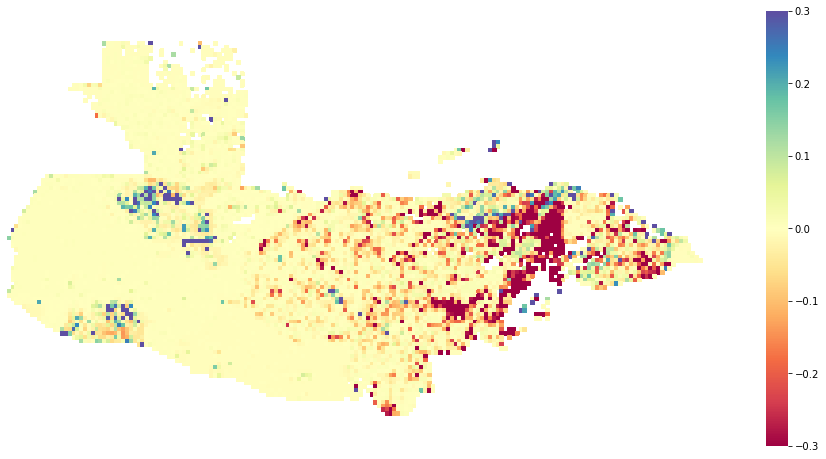

In [19]:
data = pd.DataFrame(data={'x':-y, 'y':x, 'z':np.log10(dp)})
data = data.pivot(index='x', columns='y', values='z')

fig = plot.figure(figsize=(16, 8))
#fig.patch.set_facecolor('xkcd:black')
ax = sns.heatmap(data, square = True, cmap = 'Spectral', xticklabels = False, yticklabels = False, vmin = -0.3, vmax = 0.3)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_facecolor('xkcd:black')
plot.savefig('/Users/jabran/Desktop/delta_pop_map.pdf')
plot.show()


In [9]:
reg, best_index = get_best_xgb_model.get_best_xgb_model()
reg.fit(X[:,best_index],y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=None, n_estimators=65,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9174674408083486, verbosity=1)

In [10]:
for i in np.arange(75): print(i, d[best_index[i]])

0 Food
1 N Roads
2 Rain
3 Rain
4 Rain
5 Rain
6 Rain
7 Rain
8 Rain
9 Temperature
10 Temperature
11 Temperature
12 Temperature
13 Temperature
14 Temperature
15 Temperature
16 Temperature
17 Temperature
18 Temperature
19 Temperature
20 Temperature
21 Temperature
22 Temperature
23 Temperature
24 Temperature
25 Temperature
26 Temperature
27 Temperature
28 Temperature
29 Temperature
30 Temperature
31 Temperature
32 Temperature
33 Temperature
34 BioClim
35 BioClim
36 BioClim
37 BioClim
38 BioClim
39 BioClim
40 BioClim
41 BioClim
42 BioClim
43 BioClim
44 BioClim
45 BioClim
46 BioClim
47 BioClim
48 BioClim
49 BioClim
50 BioClim
51 BioClim
52 BioClim
53 BioClim
54 Government Vector
55 Government Vector
56 Government Vector
57 Government Vector
58 Government Vector
59 Government Vector
60 Government Vector
61 Government Vector
62 Government Vector
63 HDI
64 HDI
65 GDP
66 GDP
67 GDP
68 Population
69 Population
70 Population
71 Relative change in Population
72 Relative change in Population
73 Relat

Here I generate the feature importance plot for the particular model I developed and tuned as shown in xgboost_optimize.ipynb. This plot is specific to that model and has to be remade if model changes.

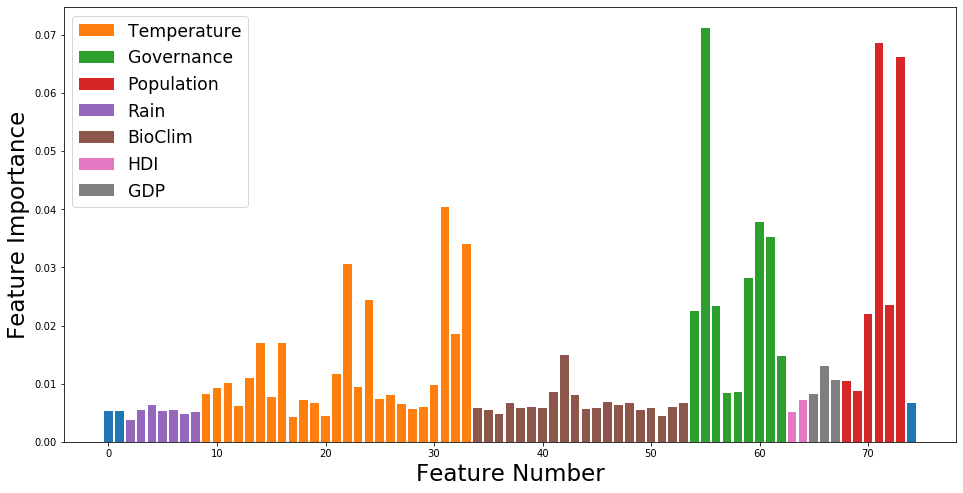

In [11]:
plot.figure(figsize=(16, 8))
plot.bar(range(len(reg.feature_importances_)), reg.feature_importances_)
irain = [2, 3, 4, 5, 6, 7, 8]
itemp = np.arange(33 - 9 + 1) + 9
ibio = np.arange(53 - 34 + 1) + 34
igov = np.arange(62 - 54 + 1) + 54
ihdi = [63, 64]
igdp = [65, 66, 67]
ipop = [68, 69, 70, 71, 72, 73]
plot.bar(np.arange(len(reg.feature_importances_))[itemp], reg.feature_importances_[itemp], label='Temperature')
plot.bar(np.arange(len(reg.feature_importances_))[igov], reg.feature_importances_[igov], label='Governance')
plot.bar(np.arange(len(reg.feature_importances_))[ipop], reg.feature_importances_[ipop], label='Population')
plot.bar(np.arange(len(reg.feature_importances_))[irain], reg.feature_importances_[irain], label='Rain')
plot.bar(np.arange(len(reg.feature_importances_))[ibio], reg.feature_importances_[ibio], label='BioClim')
plot.bar(np.arange(len(reg.feature_importances_))[ihdi], reg.feature_importances_[ihdi], label='HDI')
plot.bar(np.arange(len(reg.feature_importances_))[igdp], reg.feature_importances_[igdp], label='GDP')

plot.legend(fontsize= 'xx-large')
plot.xlabel('Feature Number',fontsize=23)
plot.ylabel('Feature Importance', fontsize=23)
plot.savefig('/Users/jabran/Desktop/feature_importance.pdf')
plot.show()